In [16]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *
from FRSolver import * 

%matplotlib inline

In [17]:
# gravity
G = 1

m1 = 1 
m2 = 1 
m3 = 1

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")
r3 = np.array([-1,0.0,0.0], dtype="float64")

p1 = 0.347111
p2 = 0.532728

# velocity 
v1 = np.array([-2 * p1,-2*p2,0], dtype="float64")
v2 = np.array([p1,p2,0], dtype="float64")
v3 = np.array([p1,p2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])

masses = np.array([m1, m2, m3])

In [18]:
E0 = TotalEnergy(r0s,v0s,G,masses)
pxhat = p1 + 0.05
pyhat = p2 + 0.05

# velocity 
v1hat = np.array([pxhat,pyhat,0], dtype="float64")
v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
v3hat = np.array([pxhat,pyhat,0], dtype="float64")
v0shat = np.array([v1hat,v2hat,v3hat])

R = findR(v0shat, E0, masses)

# position
r1hat = np.array([-R,0.0,0.0], dtype="float64")
r2hat = np.array([0,0.0,0.0], dtype="float64")
r3hat = np.array([R,0.0,0.0], dtype="float64")
r0shat = np.array([r1hat,r2hat,r3hat])

In [19]:
T = 1000
C = 0.5
traj, stability = fullSolver(T, C, r0s, v0s, G, masses)
traj2, stability = fullSolver(T, C, r0shat, v0shat, G, masses)

In [20]:
print(stability)

1


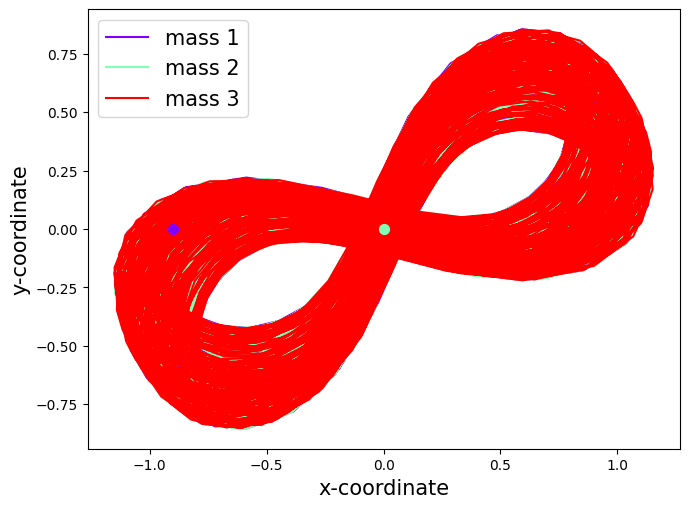

In [21]:
PlotOrbits(traj2)

In [22]:
def distCalculator(rs):
    N = len(rs)
    Rs = []
    for i in range(N):
        for j in range(i + 1, N):
            Rs.append(np.linalg.norm(rs[i] - rs[j]))
    Rs = np.array(Rs)
    return Rs[:-1] / np.sum(Rs)

def fillGrid(path, gridsize = 1000):
    grid = np.zeros((gridsize, gridsize))

    for pos in path:

        grid_x = int(2 * (pos[0] - 1e-15) * gridsize)
        grid_y = int(2 * (pos[1] - 1e-15) * gridsize)

        grid[grid_x][grid_y] = 1

    return grid

In [23]:
pos = np.array([distCalculator(rs) for rs in traj[1]])
pos2 = np.array([distCalculator(rs) for rs in traj2[1]])

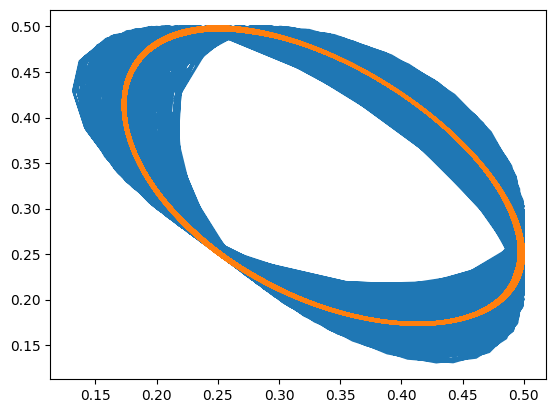

In [24]:
plt.plot(pos2[:,0], pos2[:,1])
plt.plot(pos[:,0], pos[:,1])

In [25]:
gs = 100
grid = fillGrid(pos, gridsize=gs)
grid2 = fillGrid(pos2, gridsize=gs)

[Text(0, 0.5, '0.5'),
 Text(0, 9.5, '0.45'),
 Text(0, 19.5, '0.4'),
 Text(0, 29.5, '0.35'),
 Text(0, 39.5, '0.3'),
 Text(0, 49.5, '0.25'),
 Text(0, 59.5, '0.2'),
 Text(0, 69.5, '0.15'),
 Text(0, 79.5, '0.1'),
 Text(0, 89.5, '0.05'),
 Text(0, 99.5, '0.0')]

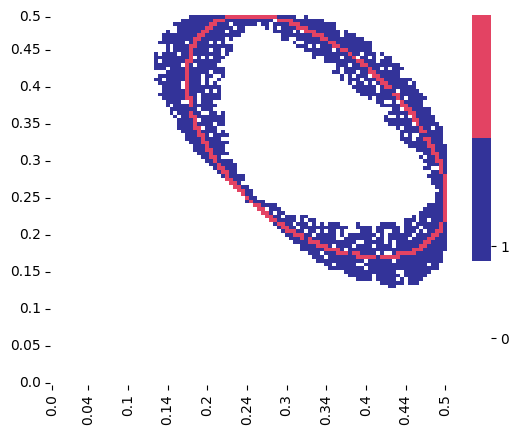

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots()

grid2prime = grid2 - grid

comb_grid = grid2prime + 2 * grid 


colors = ['#00204C', 'green', '#FDE724']  # Define the colors for each level
colors = ['white', 'navy', 'crimson']
cmap = ListedColormap(colors)

sns.heatmap(np.flipud(comb_grid), cmap = cmap, ax = ax, cbar = True, alpha = .8)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.array([0.25,0.75]))
colorbar.set_ticklabels([0,1])

positions = np.linspace(0,1,gs, endpoint= False) * 0.5
# Determine the tick positions
num_ticks = 11
tick_positions = np.linspace(0, positions.shape[0] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positions + 0.5)
ax.set_yticks(tick_positions + 0.5)
ax.set_xticklabels(np.round(positions,2)[tick_positions])
ax.set_yticklabels(np.flip(np.round(positions,2))[tick_positions])

In [27]:
print(np.sum(grid))
print(np.sum(grid2))

249.0
1650.0


In [28]:
stability, variance, maxE, maxT = shapeSolver(T, C, r0s, v0s, G, masses)
stability2, variance2, maxE2, maxT2 = shapeSolver(T, C, r0shat, v0shat, G, masses)

In [29]:
print('variance', variance)
print('variance 2', variance2)

variance 1952.0
variance 2 5104.0


In [57]:
exs = np.linspace(-0.4,0.4,251)
eys = np.flip(np.linspace(-0.4, 0.4, 251))

In [74]:
T = 1000
C = 0.2

In [75]:
E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
rs_trajs = []
ts_trajs = []
vs_trajs = []
Es_trajs = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = p1 + ex
        pyhat = p2 + ey

        # velocity 
        v1hat = np.array([pxhat,pyhat,0], dtype="float64")
        v2hat = np.array([-2 * pxhat,-2*pyhat,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)
        
        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        

        traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses)

        ts_traj = traj[0]
        rs_traj = traj[1]
        vs_traj = traj[2]
        Es_traj = traj[3]
        ts_trajs.append(ts_traj)
        rs_trajs.append(rs_traj)
        vs_trajs.append(vs_trajs)
        Es_trajs.append(Es_trajs)
        stabilities.append(stability)

-0.4 0.4
-0.4 0.39680000000000004
-0.4 0.39360000000000006
-0.4 0.39039999999999997
-0.4 0.3872
-0.4 0.384
-0.4 0.3808
-0.4 0.37760000000000005
-0.4 0.37440000000000007
-0.4 0.3712
-0.4 0.368
-0.4 0.3648
-0.4 0.36160000000000003
-0.4 0.35840000000000005
-0.4 0.35519999999999996
-0.4 0.352
-0.4 0.3488
-0.4 0.3456
-0.4 0.34240000000000004
-0.4 0.33920000000000006
-0.4 0.33599999999999997
-0.4 0.3328
-0.4 0.3296
-0.4 0.3264
-0.4 0.32320000000000004
-0.4 0.32000000000000006
-0.4 0.31679999999999997
-0.4 0.3136
-0.4 0.3104
-0.4 0.30720000000000003
-0.4 0.30400000000000005
-0.4 0.30079999999999996
-0.4 0.2976
-0.4 0.2944
-0.4 0.2912
-0.4 0.28800000000000003
-0.4 0.28480000000000005
-0.4 0.28159999999999996
-0.4 0.2784
-0.4 0.2752
-0.4 0.272
-0.4 0.26880000000000004
-0.4 0.26560000000000006
-0.4 0.26239999999999997
-0.4 0.2592
-0.4 0.256
-0.4 0.2528
-0.4 0.24960000000000004
-0.4 0.24640000000000006
-0.4 0.24319999999999997
-0.4 0.24
-0.4 0.2368
-0.4 0.23360000000000003
-0.4 0.2304000000000000

In [76]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=1000)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/variances(C=0.2, GS=1000).csv")

In [77]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=500)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/variances(C=0.2, GS=500).csv")

In [78]:
variances = []
for i, rs_traj in enumerate(rs_trajs):
    if stabilities[i] == 1:
        path = np.array([distCalculator(rs) for rs in rs_traj])
        grid = fillGrid(path, gridsize=300)
        variances.append(np.sum(grid))
    else:
        variances.append(20000)

df = pd.DataFrame(variances)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/variances(C=0.2, GS=300).csv")

In [79]:
df = pd.DataFrame(ts_trajs)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/(C=0.2)ts_trajs.csv")

df = pd.DataFrame(rs_trajs)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/(C=0.2)rs_trajs.csv")

df = pd.DataFrame(vs_trajs)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/(C=0.2)vs_trajs.csv")

df = pd.DataFrame(Es_trajs)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/(C=0.2)Es_trajs.csv")

df = pd.DataFrame(stabilities)
df.to_csv("Data/Fig8/Fig8(0.4x0.4)/(C=0.2)stabilities.csv")

C:\Users\Will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


MemoryError: Unable to allocate 29.6 GiB for an array with shape (63001, 63001) and data type object

In [80]:
variances = np.array(variances).reshape(len(exs), len(eys))
stabilities = np.array(stabilities).reshape(len(exs),len(eys))

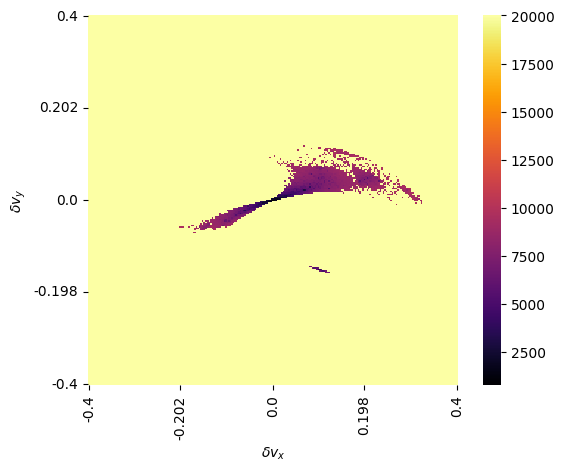

In [82]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'inferno',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

In [ ]:
print(np.min(variances))

323.0


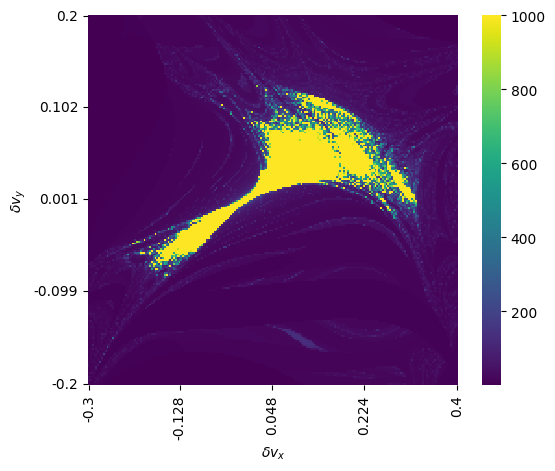

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(ts.T,cmap = 'viridis',  cbar=True, ax=ax, vmax = 1000)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

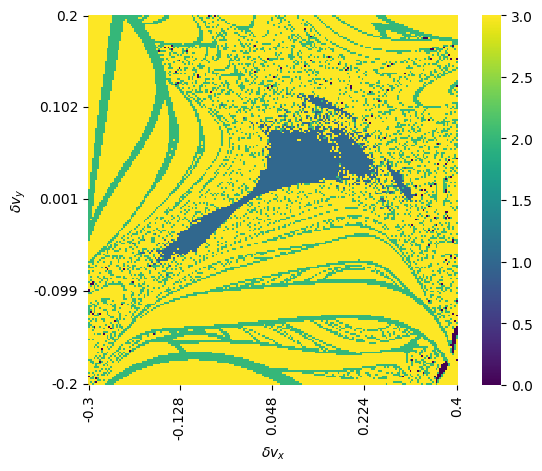

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(Es.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()

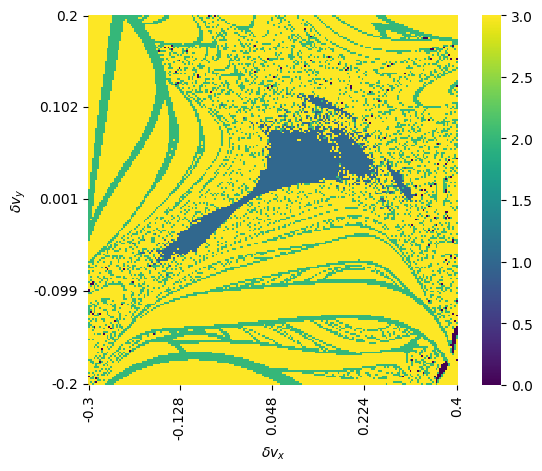

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(stabilities.T,cmap = 'viridis',  cbar=True, ax=ax)

# Determine the tick positions
num_ticks = 5
tick_positionsx = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 
tick_positionsy = np.linspace(0, variances.shape[1] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positionsx + 0.5)
ax.set_yticks(tick_positionsy + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positionsx])
ax.set_yticklabels(np.round(eys,3)[tick_positionsy])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

ax.set_aspect('equal')
# Show the plot
plt.show()